In [180]:
import pandas as pd

#读入数据
df = pd.read_csv('credit-g.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [181]:
#查看缺失数据
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [182]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [183]:
#查看每一列数据出现的频率
for i in range(len(df.columns)):
    print(df.iloc[:,i].value_counts())
    print('\n')

'no checking'    394
<0               274
0<=X<200         269
>=200             63
Name: checking_status, dtype: int64


24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: duration, dtype: int64


'existing paid'                     530
'critical/other existing credit'    293
'delayed previously'                 88
'all paid'                           49
'no credits/all paid'                40
Name: credit_history, dtype: int64


radio/tv                280
'new car'               234
furniture/equipment     181
'used car'              103
business                 97
education                50
repairs                  22
'domestic appliance'     12
other                    12
retraining                9


异常值处理并将所有类型不为int64的列进行独热编码

In [184]:
n = 0
columns_list = []
for i in df.columns:
    if df.dtypes[n] != 'int64' :
        columns_list.append(i)
    else:
        twice_std1 = df.iloc[:,n].mean() + 2 * df.iloc[:,n].std()
        twice_std2 = df.iloc[:,n].mean() - 2 * df.iloc[:,n].std()
        for j in range(len(df)):
            if df.iloc[j,n] > twice_std1:
                df.iloc[j,n] = twice_std1
            elif df.iloc[j,n] < twice_std2:
                df.iloc[j,n] = twice_std2
    n += 1
df=pd.get_dummies(df,columns = columns_list[:-1])

df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_'no checking',checking_status_0<=X<200,...,housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.000000,1169.0,4,4,58.296937,2.0,1.000000,good,0,0,...,1,0,0,0,0,1,0,1,0,1
1,45.020629,5951.0,2,2,22.000000,1.0,1.000000,bad,0,1,...,1,0,0,0,0,1,1,0,0,1
2,12.000000,2096.0,2,3,49.000000,1.0,1.879172,good,1,0,...,1,0,0,0,1,0,1,0,0,1
3,42.000000,7882.0,2,4,45.000000,1.0,1.879172,good,0,0,...,0,0,0,0,0,1,1,0,0,1
4,24.000000,4870.0,3,4,53.000000,2.0,1.879172,bad,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.000000,1736.0,3,4,31.000000,1.0,1.000000,good,1,0,...,1,0,0,0,1,0,1,0,0,1
996,30.000000,3857.0,4,4,40.000000,1.0,1.000000,good,0,0,...,1,0,1,0,0,0,0,1,0,1
997,12.000000,804.0,4,4,38.000000,1.0,1.000000,good,1,0,...,1,0,0,0,0,1,1,0,0,1
998,45.000000,1845.0,4,4,23.000000,1.0,1.000000,bad,0,0,...,0,0,0,0,0,1,0,1,0,1


数值化'class'列

In [185]:
from sklearn import preprocessing

class_LE = preprocessing.LabelEncoder()
df['class'] = class_LE.fit_transform(df['class'].values)
df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_'no checking',checking_status_0<=X<200,...,housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.000000,1169.0,4,4,58.296937,2.0,1.000000,1,0,0,...,1,0,0,0,0,1,0,1,0,1
1,45.020629,5951.0,2,2,22.000000,1.0,1.000000,0,0,1,...,1,0,0,0,0,1,1,0,0,1
2,12.000000,2096.0,2,3,49.000000,1.0,1.879172,1,1,0,...,1,0,0,0,1,0,1,0,0,1
3,42.000000,7882.0,2,4,45.000000,1.0,1.879172,1,0,0,...,0,0,0,0,0,1,1,0,0,1
4,24.000000,4870.0,3,4,53.000000,2.0,1.879172,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.000000,1736.0,3,4,31.000000,1.0,1.000000,1,1,0,...,1,0,0,0,1,0,1,0,0,1
996,30.000000,3857.0,4,4,40.000000,1.0,1.000000,1,0,0,...,1,0,1,0,0,0,0,1,0,1
997,12.000000,804.0,4,4,38.000000,1.0,1.000000,1,1,0,...,1,0,0,0,0,1,1,0,0,1
998,45.000000,1845.0,4,4,23.000000,1.0,1.000000,0,0,0,...,0,0,0,0,0,1,0,1,0,1


归一化

In [186]:
from sklearn.preprocessing import MinMaxScaler

scaler = {}  # 创建一个字典，存储每一列不同归一化参数的函数
for i in range(len(df.columns)-1):
    scaler[i] = MinMaxScaler(feature_range=(-1, 1))
    df.iloc[:, i] = scaler[i].fit_transform(df.iloc[:, i].values.reshape(-1, 1))

划分数据集

In [187]:
from sklearn.model_selection import train_test_split

all_inputs = df[[i for i in list(df.columns) if i != 'class']]
all_classes = df['class']

x_train, x_test, y_train, y_test = train_test_split(all_inputs, all_classes, train_size=0.8, random_state=1)

使用决策树算法进行分析

In [188]:
from sklearn.tree import DecisionTreeClassifier

#定义一个决策树的对象
decision_tree_classifier = DecisionTreeClassifier()

#训练模型
decision_tree_classifier.fit(x_train, y_train)

#所得模型的准确性
decision_tree_classifier.score(x_test, y_test)

0.65

交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合

[0.65 0.65 0.73 0.66 0.64 0.66 0.71 0.68 0.64 0.69]


Text(0.5, 1.0, 'Average score: 0.671')

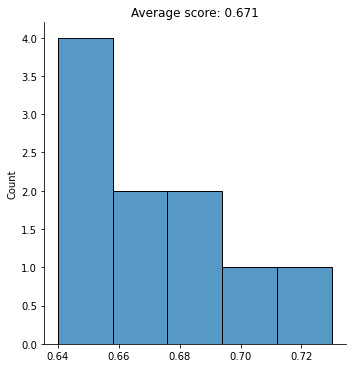

In [189]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)#cv：选择每次测试折数 
print (cv_scores)

sb.displot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

[0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]


Text(0.5, 1.0, 'Average score: 0.7')

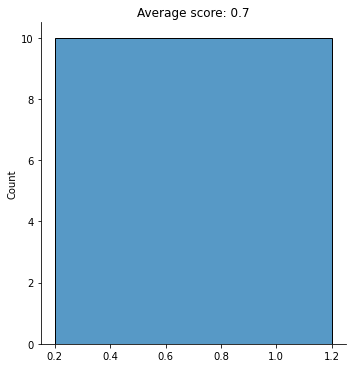

In [190]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
print (cv_scores)
sb.displot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

使用GridSearchCV网格搜索进行自动调参，把参数输进去，能给出最优化的结果和参数

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation  = StratifiedKFold(n_splits = 10, shuffle=True)  
cross_validation.get_n_splits(all_classes)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7110000000000001
Best parameters: {'max_depth': 4, 'max_features': 4}
